In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

#### Analytic Frequencies of Cantilever Modes:

#####Analysis following "Foundations of Nanomechanics" by Andrew Cleland

The Cantilever wave equation for a beam whose length is in the z direction is 

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2}$$

$E$ is Young's modulus for the material, $I_y$ is the polar moment of inertia for the y axis of the beam, $\rho$ is the material density, and $A$ is the beam cross sectional area

The Cantilever has boundary conditions

$$ U(0) = 0$$
$$ \frac{dU}{dz} = 0 $$
$$ \frac{d^2U}{dz^2} = 0$$
$$ \frac{d^3U}{dz^3} = 0$$ 

The boundary conditions constrain the frequencies determined by the equation

$$\cos(\beta_n l) \cosh(\beta_n l) + 1 = 0 $$

which has solutions $ \beta_n l = 1.875, 4.694, 7.855, 10.996...$

The corresponding frequencies are

$$ f_n = \frac{\omega_n}{2\pi} = \frac{(\beta_nl)^2}{2 \pi l^2}\sqrt{\frac{E I}{\rho A}}$$



In [2]:
BL = [1.8751,4.69409,7.8539, 10.996] #1/m
L = 10*10**(-6) #m
E = 8.55*10**10 #N/m^2
w = 0.5*10**(-6) #m
h = 0.1*10**(-6) #m
I = w*h**3/12 #m^4
r = 5500 #kg/m^3
A = w*h #m^2

In [3]:
for B_nL in BL:
    f_n = (B_nL**2/(2*np.pi*L**2))*np.sqrt(E*I/(r*A))
    print f_n, 'Hz'

636912.964117 Hz
3991480.80796 Hz
11173827.3287 Hz
21902852.7557 Hz


The functional form for the displacement of mode n is

$$ U_n = a_n(\cos(\beta_n z) - \cosh(\beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z)) $$

with $a_n/b_n = -1.3622, -0.9819, -1.008, -1.000$

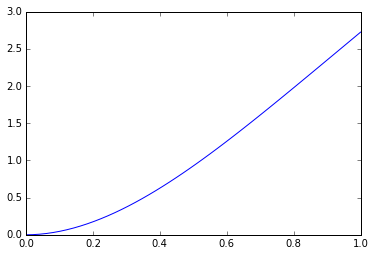

In [4]:
a = [-1.3622, -0.9819, -1.008, -1.000]
b = [1, 1, 1 ,1]
z = np.linspace(0,1)
mode = 1
B_nL = BL[mode-1]
a_n = a[mode-1]
b_n = b[mode-1]
U_n = a_n*(np.cos(B_nL*z)-np.cosh(B_nL*z))+b_n*(np.sin(B_nL*z)-np.sinh(B_nL*z))
f, ax = plt.subplots()
ax.plot(z,U_n)


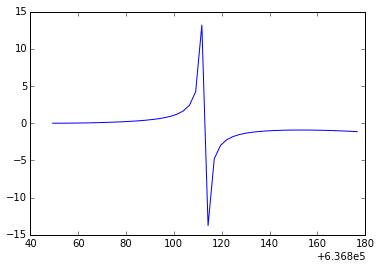

In [5]:
mode=1
f_0 = 1
B_nL = BL[mode-1]
f_n = (B_nL**2/(2*np.pi*L**2))*np.sqrt(E*I/(r*A))
w_n = f_n*2*np.pi
f_d = np.linspace(f_n-f_n/10000,f_n+f_n/10000)
w_d = f_d*2*np.pi
b = [1,1,1,1]
b_n = b[mode-1]
a_n = ((f_0/(r*A*(w_n**2-w_d**2)))-b_n*(np.sin(B_nL)-np.sinh(B_nL)))/(np.cos(B_nL)-np.cosh(B_nL))
#a_n = a[mode-1]
U_n = a_n*(np.cos(B_nL*z)-np.cosh(B_nL*z))+b_n*(np.sin(B_nL*z)-np.sinh(B_nL*z))
f2, ax2 = plt.subplots()
ax2.plot(f_d,U_n)

####Driven Cantilever

If we have a uniformly distributed force per unit length $f(z,t) = f_0 e^{- i \omega t}$ directed along the x-axis, the beam wave equation is modified

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2} +  f_0 e^{-i \omega_c t}$$

The solution for the position dependent displacement for $\omega_c$ close to $\omega_1$,in the limit of small dissipation $Q^{-1}$, and for times long in comparison to the damping time for the beam so that $\omega_ct/Q \gg 1$ is

$$U(z,t) = \frac{\eta_1}{\omega_1^2-\omega_c^2-i\omega_1^2/Q} \frac{f_0}{M}U_1(z)e^{-i \omega_c t}$$

with

$$U_1(z) = a_1(\cos(\frac{\beta_1 L z}{L}) - \cosh(\frac{\beta_1 L z}{L})) + b_1(\sin(\frac{\beta_1 L z}{L}) - \sinh(\frac{\beta_1 L z}{L})) $$

After normalizing the eigenfunctions, $a_1 = L$ and $b_1 = L/ 1.01781$. $\beta_1 L = 1.8751$. 

$\eta_1$ is the first moment of the eigenfunction $U_1(z)$,

$$ \eta_1 = \frac{1}{L^2} \int_0^L U_1(z) dz = 0.8309$$

The thermoelastic dissipation $1/Q_t$ for a thin beam under transverse flexure is approximately given by 

$$ \frac{1}{Q_t} = \Delta_t \frac{\omega \tau_t}{1+\omega^2 \tau_t^2} $$

where 

$$ \Delta_t = \frac{E_{ad} - E}{E} = \frac{E \alpha^2 T_0}{C_p}$$



$E$ is the isothermal value of Young's modulus, $\alpha$ is the material's thermal-expansion coefficient, $C_p$ is the heat capacity per unit volume at constant pressure.

The characteristic time $\tau_t$ is given by

$$ \tau_t = \frac{w^2}{\pi^2 D} $$

$w$ is the beam thickness, and $D$ is the thermal diffusivity of the solid, $D = \kappa/c_v$ .

$M$ is the mass of the beam

$$M = \rho A L $$


659092.140699


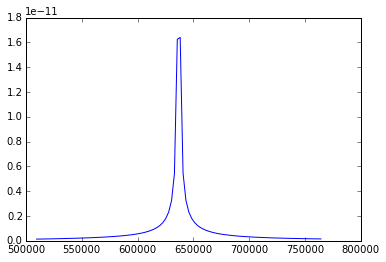

In [6]:
f_0 = 1
B_1L = 1.8751
w_1 = (B_1L**2/(L**2))*np.sqrt(E*I/(r*A))
f_1 = w_1/(2*np.pi)
alpha = 5.73*10**(-6) #1/K
T_0 = 300 #K
C_p = 330*r #J/(kg*K)*kg/m^3
delta = E*(alpha**2)*T_0/C_p
D = 3.1*10**(-5) #m^2/s
tau = w**2/(np.pi**2*D)
f_c = np.linspace(f_1-f_1/5,f_1+f_1/5, num=100)
w_c = f_c*2*np.pi
a_1 = L
b_1 = L/1.01781
n_1 = 0.8309
z = L
t = np.linspace(0,3/w_1)
M = r*A*L #kg

U_1 = a_1*(np.cos(B_1L*z)-np.cosh(B_1L*z))+b_1*(np.sin(B_1L*z)-np.sinh(B_1L*z))
U = []
for freq in w_c:
    Q = (1/delta)*((1+freq**2*tau**2)/(freq*tau))
    y = np.max(np.real(((n_1)/(w_1**2-freq**2-1j*w_1**2/Q))*(f_0/M)*U_1*np.e**(-1j*freq*t)))
    U.append(y)
f3, ax3 = plt.subplots()
ax3.plot(f_c,U)
Q = (1/delta)*((1+w_1**2*tau**2)/(w_1*tau))
print Q

#### Comsol Simulation

We first solve for the undamped and undriven beam. The eigenfrequencies are displayed below

In [7]:
mode1 = mpimg.imread('20150727_cantilever_mode1.png')
mode2 = mpimg.imread('20150727_cantilever_mode2.png')
mode3 = mpimg.imread('20150727_cantilever_mode3.png')
mode4 = mpimg.imread('20150727_cantilever_mode4.png')

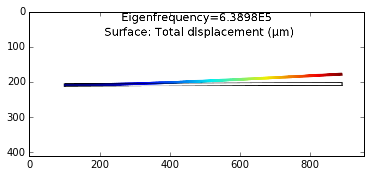

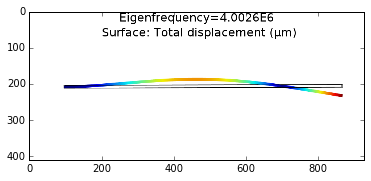

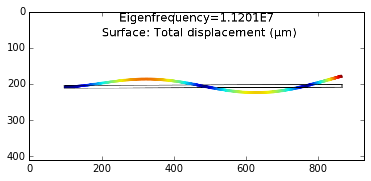

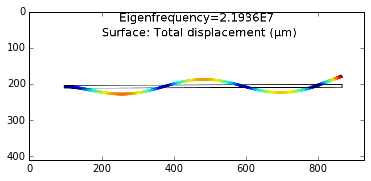

In [8]:

c_modes = [mode1, mode2, mode3, mode4]
for img in c_modes:
    plt.figure()
    plt.imshow(img)
    plt.show()